#  What determines a higher  Win Rate in Leage of Legends: ARAM Mode?
Target Audience: Non-Technical 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import requests
import json
import csv
import numpy as np
from functools import reduce

In [2]:
ARAM_data= pd.read_csv(r'ARAM_NA_September_Status.csv')
ARAM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Champion      165 non-null    object 
 1   Games played  165 non-null    int64  
 2   KDA           165 non-null    object 
 3   Win Rate      165 non-null    float64
 4   Pick Rate     165 non-null    float64
 5   Ban Rate      165 non-null    int64  
 6   CS            165 non-null    float64
 7   Gold          165 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 10.4+ KB


# Finding Correlations

In [12]:
ARAM_data= ARAM_data.drop(['Ban Rate'], axis = 1)

The 'Ban Rate' column is dropped due to the fact that this mode does not allow banning 

In [13]:
ARAM_data.dropna().sort_values(by='Win Rate',ascending= False )

,Champion,Games played,KDA,Win Rate,Pick Rate,CS,Gold
56,Lillia,218681,3.25:1,0.5402,0.0673,44.88,13881
96,Sion,168297,2.55:1,0.5385,0.0518,48.50,13873
121,Galio,131440,3.31:1,0.5345,0.0404,33.07,12817
45,Janna,227322,5.52:1,0.5344,0.0699,21.65,12071
101,Lissandra,160179,3.14:1,0.5335,0.0493,57.68,13846
...,...,...,...,...,...,...,...
50,Katarina,224272,2.61:1,0.4406,0.0690,36.81,14352
128,Naafiri,126536,2.44:1,0.4314,0.0389,44.71,14301
145,Qiyana,104937,2.63:1,0.4261,0.0323,31.61,14281
136,Briar,118587,2.16:1,0.4074,0.0500,32.06,12928


In [14]:
ARAM_data.sort_values(by='Gold',ascending= False )

,Champion,Games played,KDA,Win Rate,Pick Rate,CS,Gold
42,Draven,235714,3.09:1,0.4966,0.0725,62.70,15952
78,Gangplank,191721,3.23:1,0.4949,0.0590,63.53,15846
28,Graves,286533,3.21:1,0.5184,0.0881,70.79,15619
122,Talon,129661,2.77:1,0.4845,0.0399,46.29,15453
65,Samira,208712,2.66:1,0.4891,0.0642,60.65,15367
...,...,...,...,...,...,...,...
72,Lulu,201829,4.56:1,0.4691,0.0621,20.26,11940
135,Milio,120682,6.19:1,0.5199,0.0371,16.94,11852
150,Rakan,95735,4.18:1,0.5078,0.0294,12.97,11715
39,Soraka,238235,5.21:1,0.4896,0.0733,10.93,11647


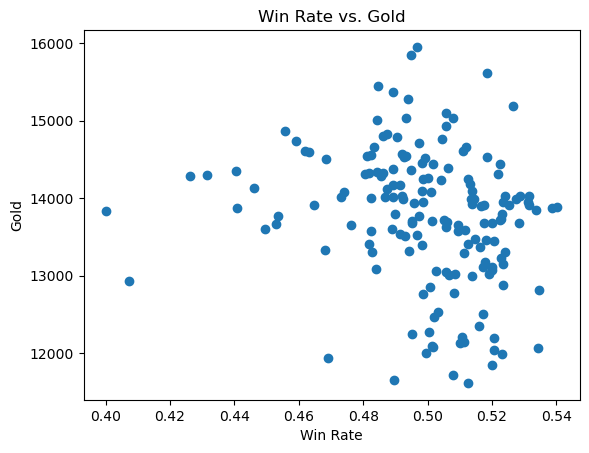

In [4]:
ax=plt.scatter(ARAM_data['Win Rate'],ARAM_data['Gold'])
plt.xlabel('Win Rate')
plt.ylabel('Gold')
plt.title("Win Rate vs. Gold")
plt.show()

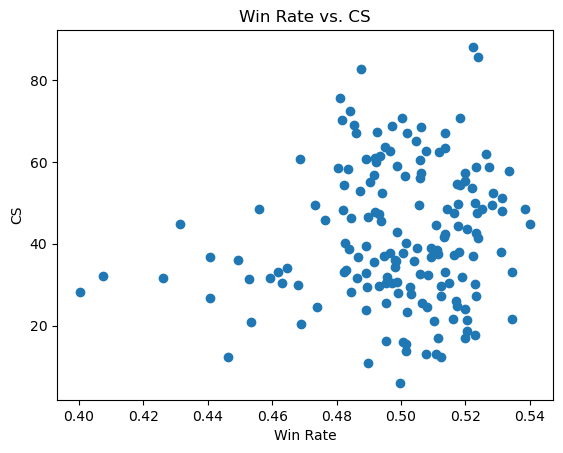

In [5]:
ax=plt.scatter(ARAM_data['Win Rate'],ARAM_data['CS'])
plt.xlabel('Win Rate')
plt.ylabel('CS')
plt.title("Win Rate vs. CS")
plt.show()

In [7]:
ARAM_data[['Win Rate', 'Gold', 'CS']].corr()
#finding the relationship between  each category  which results in a matrix

,Win Rate,Gold,CS
Win Rate,1.000000,-0.209742,0.111633
Gold,-0.209742,1.000000,0.707329
CS,0.111633,0.707329,1.000000


For those who do not play League of Legends, a typical win in League of Legends consist of destorying the enemy base with gold that is earned by killing minons and other players. Therefore, it is reasonable enough to suspect that gold and mininon count(CS) would influence heavily on the 'Win Rate' column. The first displayed graph showcases the relationship between Win Rate and Gold, each dot represents a playable character. The 'Win Rate VS Gold' chart has a downward trend.  Indicating that one value is increasing while the other is decreasing, in this case the increasing value is Win Rate while the decreasing value is Gold. This part of data would be supporting the null hypothesis.  However, in the 'Win Rate vs. CS' graph it shows that there is a positive trend  with Win Rate and CS. The .corr() section provides more evidence for the relationship between these three columns, showing a negative correlation for gold and a small positive correlation to CS. This is because in order to win, the minons do have to reach the enemy base. Therefore, the more minons that a player kills the  farther the ally minons push, resulting a victory. Overall, the data suggest that Gold does not have an influence on Win Rate and that other categories may influence Win rate.Therefore, other factors that  affect Win Rate. Factors that should be investgated could be the role of the player or the amount of damage.  The damage aspect can be further dissected into type of damage such as damage to champions, minons, and/or objectives. Another aspect is creating a heatmap of the field and observe where the winning-minons spend most of their time, investigating the hypothesis that the farther the minons push the more likelihood of a victory.